In [1]:
import requests
import pandas as pd
import json

### Data Preprocessing

In [2]:
#get access token
def authority():
    cid = '06d0acf028b64df4b2057785fb278b13'
    secret = '3c15086503c04283b5e0567f94bc56b1'
    url = "https://accounts.spotify.com/api/token"
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    data = {"grant_type": "client_credentials", "client_id": cid, "client_secret": secret}

    response = requests.post(url, headers=headers, data=data)
    token=response.json()["access_token"]

    headers = {"Authorization": f"Bearer {token}"}
    return(headers)
        

In [3]:
#playlists

sad_song_1="37i9dQZF1DX3YSRoSdA634"#200
sad_song_2="37i9dQZF1DXbrUpGvoi3TS" #100
sad_song_3="4AgjOnto33QrMYHykHd4Nb"#190
sad_song_4='7gAJ6XeUKaBaDk6i35PQ0u'#106
sad_song_5="3c0Nv5CY6TIaRszlTZbUFk"#129
sad_song_6="28jf8ptEGtkE73Id1CyGqS"#154
sad_song_7="7i6kwqP5nUlLiQiUOGxqZ8"#136
sad_song_8="2NLt9TlYthbf4pUlTiEdnk" #165

depression_1="1bura1ajRRqnz6ZVR1rFc9"#409
depression_2="0oC0qOdBfquoWBuZY1Yner" #452
depression_3="19fsRHCQloSW8ayvdYhjBE" #79
depression_4="4XwJuNp9IYR2DHp7Krbhh8" #124
depression_5="3OYkdSDJxjlgEoU0HZAlJt" #61

happy="7ws6CSGY50ZNDPqusYtmiJ"#1505


chilling_1="37i9dQZF1DX889U0CL85jj" #100
chilling_2="3eswPXD4cEvcUO5N6PTnw2" #130
chilling_3="7IWpDUMxtwUh4oEKIo3PiH"#198
chilling_4="4FeNVXjmzaPYG3nALxOj7e"#281
chilling_5="37i9dQZF1DX0w6SRvtNXby"#100
chilling_6="2uPbxL3BDp1iektrF21oYp"#387
chilling_7="6ra7yNqCGRjpPjoBKtgHlD"#185


angry_1="37i9dQZF1EIgNZCaOGb0Mi"
angry_2="37i9dQZF1EIhuCNl2WSFYd"
angry_3="37i9dQZF1EIcpc1Z28flXB"
angry_4="37i9dQZF1EIeOxW84cXsvq"
angry_5="37i9dQZF1EIhPEivbiO6xe"
angry_6="37i9dQZF1EIcRK7JMCMZ3M"
angry_7="37i9dQZF1EIhLkruweqFVr"
angry_8="37i9dQZF1EIcQR8GTL6NML"
angry_9="37i9dQZF1EId0AxZAYqRyP"
angry_10="37i9dQZF1EIgdwMyCdMOpb"
angry_11="37i9dQZF1EIdPM7mGygW5M"
angry_12="37i9dQZF1EIfLeXYo5Rqhb"
angry_13="37i9dQZF1EIdfWNyTiDMeO"
angry_14="37i9dQZF1EIdjHvNyr7jpO"
angry_16="0sD9uVxNdN0unCCjlvwAyU"
angry_17="37i9dQZF1EIfsVKRKreqbD"
angry_18='37i9dQZF1EIfMr0kwe5rMe'
angry_19="37i9dQZF1EIh2g9BXwCTIZ"
angry_20="37i9dQZF1EIgE8oZZ6A4nR"
angry_21="37i9dQZF1EIfiCZoEZyAED"
angry_22="37i9dQZF1EIdOaXcT7px7B"
angry_23="37i9dQZF1EIgVsLOsdsXC8"
angry_24="609gQW5ztNwAkKnoZplkao"
angry_25="37i9dQZF1DX3YSRoSdA634"
angry_26="71Xpaq3Hbpxz6w9yDmIsaH"



In [4]:
#integrate playlists
#sad_song=[sad_song_1,sad_song_2,sad_song_3,sad_song_4,sad_song_5,sad_song_6,sad_song_7,sad_song_8]
depression_songs=[depression_1,depression_2,depression_3,depression_4,depression_5]
happy_songs=[happy]
chill_songs=[chilling_1,chilling_2,chilling_3,chilling_4,chilling_5,chilling_6,chilling_7]
angry_songs=[angry_1,angry_2,angry_3,angry_4,angry_5,angry_6,angry_7,angry_8,angry_9,angry_10,angry_11,angry_12,angry_13,angry_14,angry_16,angry_17,angry_18,angry_19,angry_20,angry_21,angry_22,angry_23,angry_24,angry_25,angry_26]

In [5]:
def get_song_id(playlists):
    id_lst=[]
    plylist_i=1
    page=0
    for playlist in playlists:
        headers=authority()
        response = requests.get(f"https://api.spotify.com/v1/playlists/{playlist}/tracks", headers=headers)
        response=response.json()
        for i in range(len(response['items'])): 
            try:
                id=response['items'][i]["track"]["id"]
                id_lst.append(id)
            except TypeError:
                print(f"{plylist_i} th playlist, {page*100+i} th song does not have id ")
                continue
    
            
        while response['next']: #finding the next page of playlist
            page+=1
            response = requests.get(response['next'], headers=headers)
            response=response.json()

            for i in range(len(response['items'])): 
                try:
                    id=response['items'][i]["track"]["id"]
                    id_lst.append(id)
                except TypeError: #
                    print(f"{plylist_i} th playlist, {page*100+i} th song does not have id ")
                    continue
        plylist_i+=1

    print("we get ",len(list(set(id_lst)))," samples")
    return(list(set(id_lst)))        



In [6]:
depression_ids=get_song_id(depression_songs)

we get  1053  samples


In [7]:
happy_ids=get_song_id(happy_songs)

we get  1258  samples


In [8]:
chill_ids=get_song_id(chill_songs)

2 th playlist, 107 th song does not have id 
2 th playlist, 115 th song does not have id 
2 th playlist, 176 th song does not have id 
2 th playlist, 182 th song does not have id 
3 th playlist, 241 th song does not have id 
3 th playlist, 280 th song does not have id 
3 th playlist, 317 th song does not have id 
3 th playlist, 365 th song does not have id 
3 th playlist, 373 th song does not have id 
3 th playlist, 403 th song does not have id 
4 th playlist, 512 th song does not have id 
we get  1804  samples


In [9]:
angry_ids=get_song_id(angry_songs)

we get  1127  samples


In [10]:
def uni_ids(playlist_name,ids):
    num=len(ids)
    new_ids=[]
    for i in range(num):
        if i >=1:
            compare_set=list(set(compare_set)-set([i]))
        else:
            compare_set=list(set(range(num))-set([i]))
        id=ids[i]
        if len(compare_set)!=0:
            for j in compare_set:
                id=list(set(id)-set(ids[j])&set(id))
            print(f"{playlist_name[i]} has {len(id)} songs")
            new_ids.append(id)
            
    new_ids.append(ids[-1])
    print(f"{playlist_name[i]} playlist has {len(ids[-1])} songs")
    return new_ids




In [11]:
new_ids=uni_ids(["happy","chill","angry","depression"],[happy_ids,chill_ids,angry_ids,depression_ids])

happy has 1169 songs
chill has 1680 songs
angry has 1024 songs
depression playlist has 1053 songs


In [12]:
def get_audio_feature(id_lst,mood):
    feature=[]
    for id in id_lst:
        headers=authority()
        response=requests.get(f"https://api.spotify.com/v1/audio-features/{id}", headers=headers)
        response=response.json()
        feature.append(response)

    data=pd.json_normalize(feature)
    data["mood"]=[mood]*data.shape[0] #add mood type
    data_final=data.drop(data.columns[[11,12,13,14,15]], axis=1)
    if "error.status" in data_final.columns:
        data_final=data_final.drop(["error.status","error.message"],axis=1)
    data_final=data_final.dropna()
    print(data_final.shape)
    return(data_final.iloc[:1000,:])



In [13]:
happy_audio_feature=get_audio_feature(new_ids[0],"happy")

(1169, 14)


In [15]:
chill_audio_feature=get_audio_feature(new_ids[1],"chilling")

(1680, 14)


In [16]:
depression_audio_feature=get_audio_feature(new_ids[3],"depression")

(1053, 14)


In [17]:
angry_audio_feature=get_audio_feature(new_ids[2],"angry")

(1022, 14)


In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [35]:
all_data=pd.concat([depression_audio_feature.iloc[:1000,:],happy_audio_feature.iloc[:1000,:],chill_audio_feature.iloc[:1000,:],angry_audio_feature.iloc[:1000,:]],ignore_index=True)
category_data=all_data[["key","mode","time_signature"]]
continuous_data=all_data[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
continuous_data_normal=pd.DataFrame(preprocessing.scale(continuous_data))
continuous_data_normal.columns = continuous_data.columns
#category_data_normal=preprocessing.scale(category_data)
#mood encoder
le = LabelEncoder()
mood = le.fit_transform(all_data['mood'])


### EDA

In [20]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows

# Get summary statistics of features of songs with different moods
pd.DataFrame(all_data.groupby('mood')[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']].describe()).T

mood                            angry       chilling     depression   
danceability     count    1000.000000    1000.000000    1000.000000  \
                 mean        0.570124       0.611861       0.555373   
                 std         0.159073       0.152185       0.139853   
                 min         0.000000       0.112000       0.153000   
                 25%         0.463000       0.511750       0.455000   
                 50%         0.568500       0.625500       0.555000   
                 75%         0.683250       0.725000       0.655000   
                 max         0.973000       0.956000       0.921000   
energy           count    1000.000000    1000.000000    1000.000000   
                 mean        0.754699       0.581957       0.488009   
                 std         0.206645       0.183478       0.224768   
                 min         0.048500       0.016700       0.014600   
                 25%         0.630750       0.459000       0.314750   
                 50%         0.812500       0.599000       0.474000   
                 75%         0.926000       0.716000       0.651000   
                 max         0.998000       0.992000       0.991000   
loudness         count    1000.000000    1000.000000    1000.000000   
                 mean       -5.483463      -7.929651      -8.359039   
                 std         2.888430       3.309042       3.444093   
                 min       -22.390000     -26.117000     -26.781000   
                 25%        -6.843500      -9.404250     -10.100250   
                 50%        -5.018000      -7.288500      -7.750000   
                 75%        -3.639250      -5.727750      -5.913500   
                 max         2.624000      -1.797000      -1.046000   
speechiness      count    1000.000000    1000.000000    1000.000000   
                 mean        0.136886       0.098859       0.077972   
                 std         0.126552       0.104371       0.091707   
                 min         0.000000       0.023500       0.023800   
                 25%         0.048450       0.034800       0.033700   
                 50%         0.081750       0.050400       0.044150   
                 75%         0.183000       0.118000       0.072775   
                 max         0.696000       0.935000       0.850000   
acousticness     count    1000.000000    1000.000000    1000.000000   
                 mean        0.141565       0.304685       0.476516   
                 std         0.234688       0.287920       0.335662   
                 min         0.000002       0.000008       0.000010   
                 25%         0.001618       0.056350       0.137750   
                 50%         0.025850       0.216000       0.495000   
                 75%         0.170250       0.511500       0.801250   
                 max         0.984000       0.993000       0.994000   
instrumentalness count    1000.000000    1000.000000    1000.000000   
                 mean        0.050772       0.096122       0.016757   
                 std         0.164939       0.239956       0.096861   
                 min         0.000000       0.000000       0.000000   
                 25%         0.000000       0.000000       0.000000   
                 50%         0.000006       0.000015       0.000000   
                 75%         0.001417       0.007170       0.000017   
                 max         0.939000       0.975000       0.967000   
liveness         count    1000.000000    1000.000000    1000.000000   
                 mean        0.221889       0.171394       0.154117   
                 std         0.172141       0.126870       0.111319   
                 min         0.024300       0.026300       0.024800   
                 25%         0.099675       0.101000       0.098075   
                 50%         0.144000       0.121000       0.114000   
                 75%         0.316250       0.200000       0.162000   
                 max    

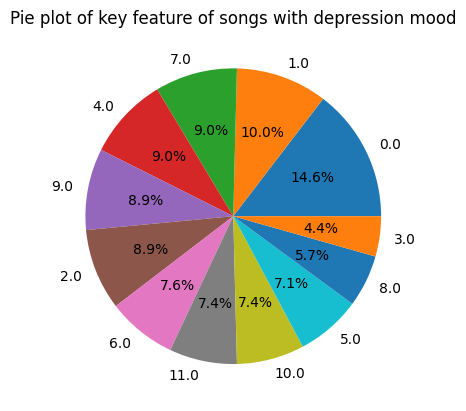

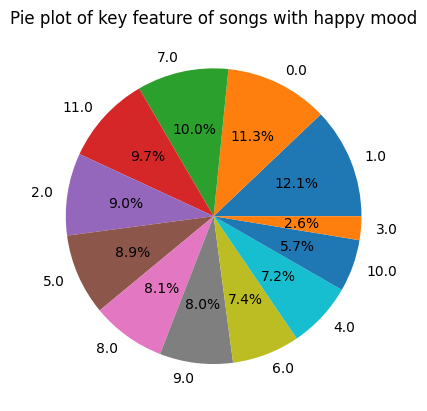

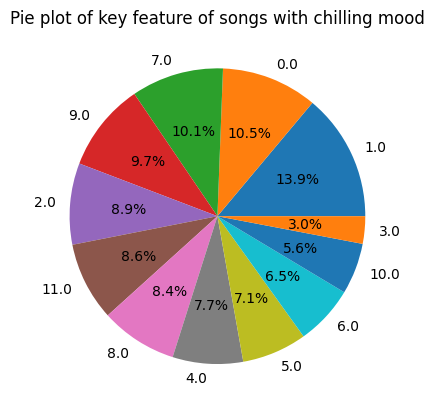

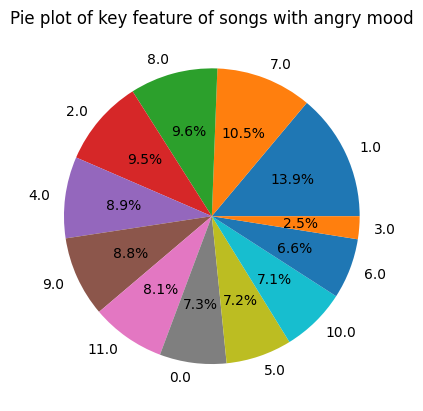

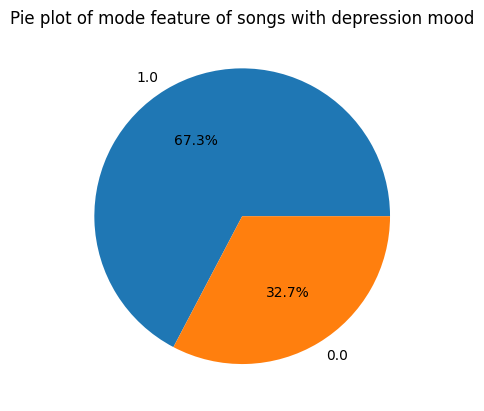

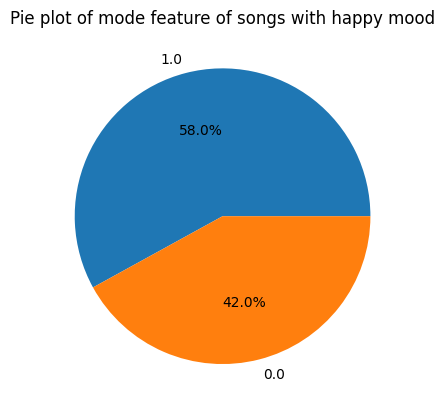

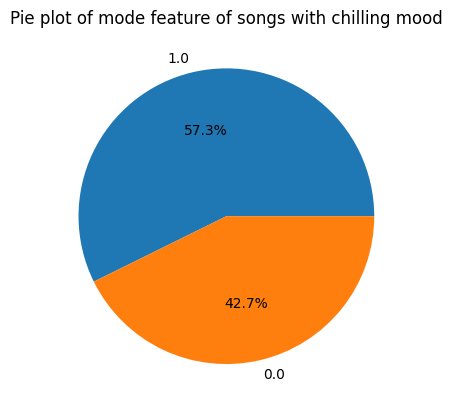

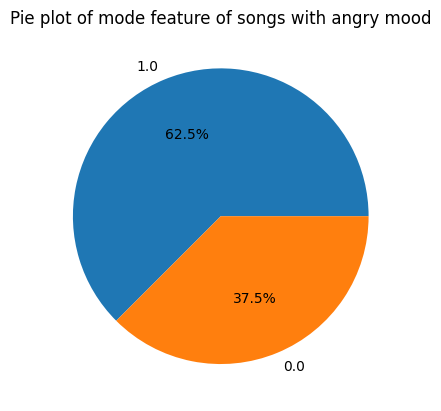

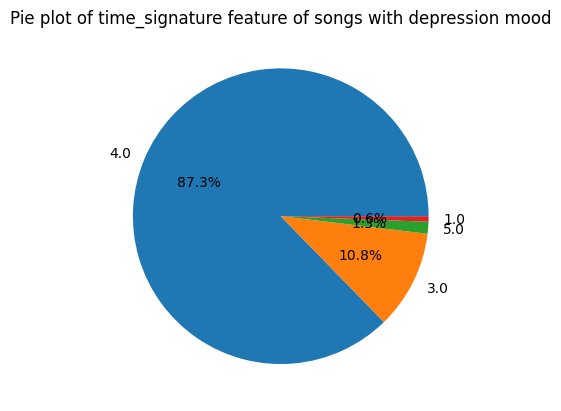

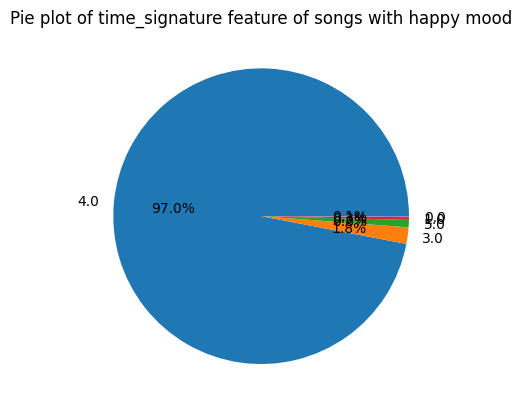

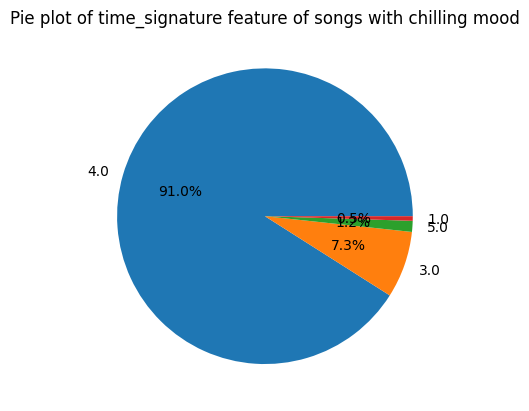

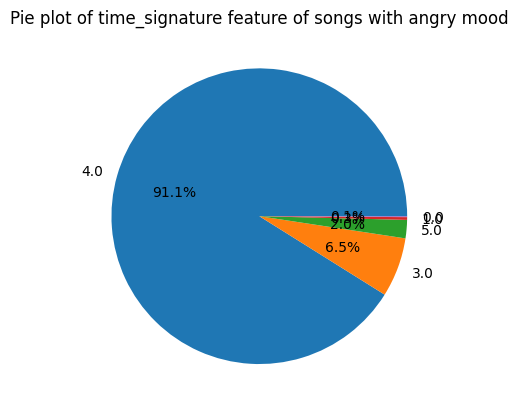

In [24]:
import matplotlib.pyplot as plt 

#Pie plot of categorical feature variables of songs with different moods
for col in category_data.columns:
    for mood in all_data['mood'].unique():
        plt.pie(all_data[all_data['mood']==mood][col].value_counts(),
                labels=all_data[all_data['mood']==mood][col].value_counts().index,
                autopct='%1.1f%%')
        plt.title('Pie plot of {} feature of songs with {} mood'.format(col,mood))
        plt.show()

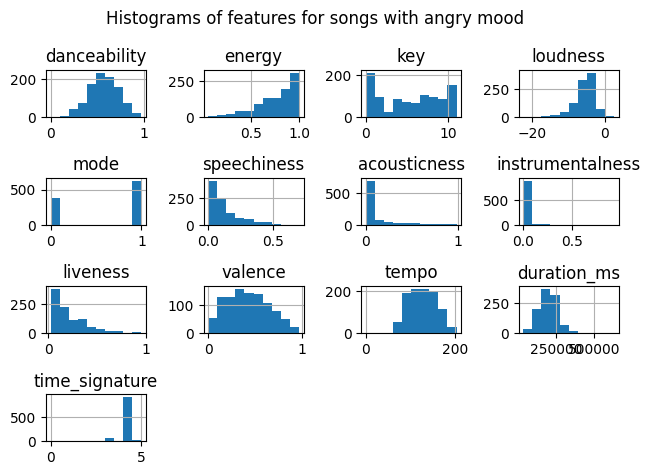

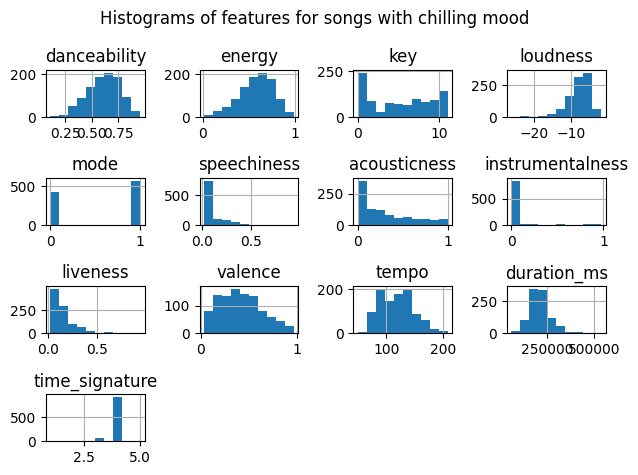

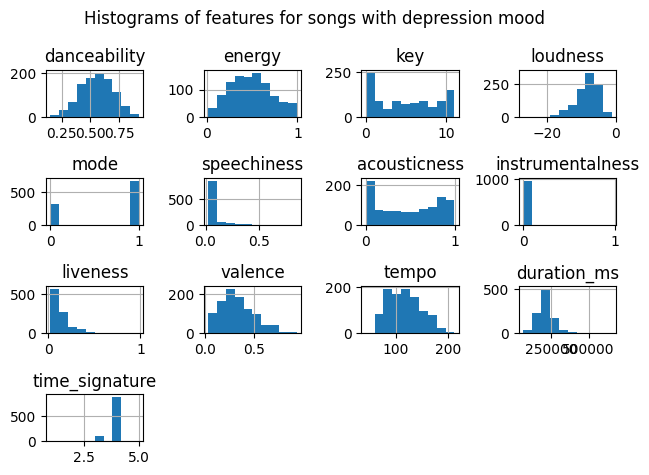

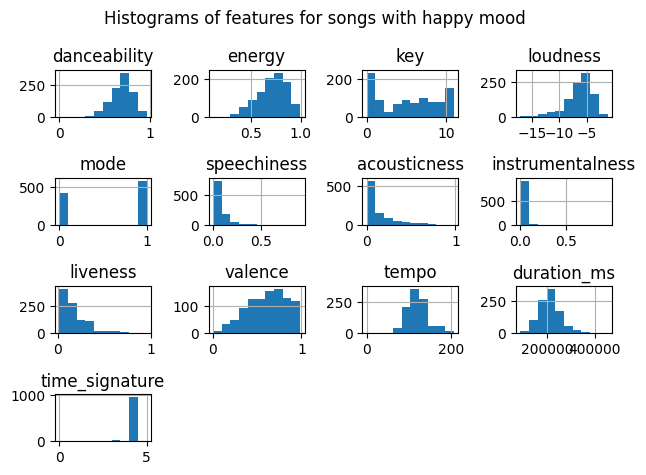

In [25]:
# plot histograms of eatures of songs with different moods
for name, group in all_data.groupby('mood'):
    group[all_data.columns[:-1].tolist()].hist(bins=10)
    plt.suptitle(f'Histograms of features for songs with {name} mood')
    plt.tight_layout()
    plt.show()


<Axes: >

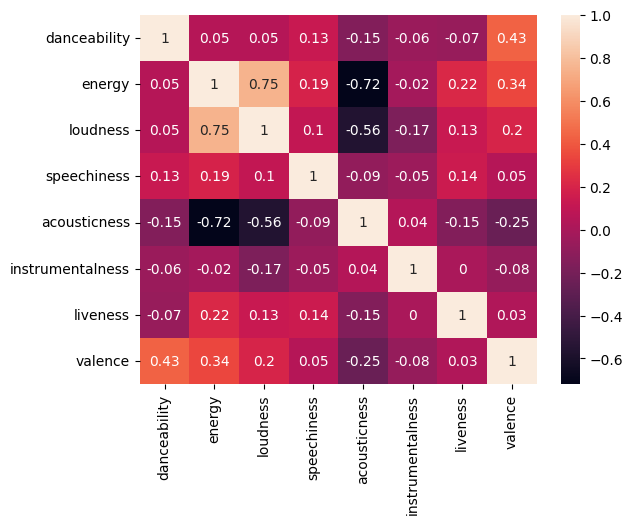

In [26]:
sns.heatmap(round(continuous_data.iloc[:,:-1].corr(),2),annot=True)

In [27]:
#base on heatmap to choose variable
variable_select=continuous_data[["danceability","energy","loudness","acousticness","valence"]]
var_select_normal=preprocessing.scale(variable_select)

In [28]:
category_data.to_csv(r'~/Desktop/category.csv', index=True, header=True)
continuous_data.to_csv(r'~/Desktop/continuous.csv', index=True, header=True)

### Model implementation

In [37]:
x_train, x_test, y_train, y_test = train_test_split(continuous_data_normal, mood, test_size=0.3, random_state=42)
category_x_train,category_x_test,category_y_train,category_y_test= train_test_split(category_data, mood, test_size=0.3, random_state=42)
var_x_train,var_x_test,var_y_train,var_y_test=train_test_split(var_select_normal,mood,test_size=0.3, random_state=42)

In [30]:
def kernel(x_train, x_test,y_train,y_test):
    for i in ['linear', 'poly', 'rbf', 'sigmoid']:
        # Create an SVM classifier with a linear kernel, OneVsOne
        ovo_clf = SVC(kernel=i,decision_function_shape='ovo')


        # Train the OVO classifier on the training data
        ovo_clf.fit(x_train, y_train)

        # Make predictions on the testing data
        y_pred = ovo_clf.predict(x_test)

        # Decode the predicted and true target variables using the inverse label encoder
        y_pred_decoded = le.inverse_transform(y_pred)
        y_test_decoded = le.inverse_transform(y_test)

        # Calculate the accuracy of the predictions
        accuracy = accuracy_score(y_test, y_pred)

        # Print the accuracy of the predictions
        print(f"Accuracy of {i} kernel:", accuracy)
                

In [38]:
#input data is continuous data
kernel(x_train,x_test, y_train,y_test)

Accuracy of linear kernel: 0.5316666666666666
Accuracy of poly kernel: 0.5175
Accuracy of rbf kernel: 0.5466666666666666
Accuracy of sigmoid kernel: 0.39666666666666667


In [39]:
#input data is category data
kernel(category_x_train,category_x_test,category_y_train,category_y_test)

Accuracy of linear kernel: 0.2825
Accuracy of poly kernel: 0.2725
Accuracy of rbf kernel: 0.2675
Accuracy of sigmoid kernel: 0.24666666666666667


In [40]:
#input data is selected continuous data
kernel(var_x_train,var_x_test,var_y_train,var_y_test)

Accuracy of linear kernel: 0.5
Accuracy of poly kernel: 0.505
Accuracy of rbf kernel: 0.53
Accuracy of sigmoid kernel: 0.405


In [2]:
from tensorflow.keras import models, layers, utils, backend as K
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

# continuous=pd.read_csv("~/Desktop/continuous.csv",index_col=[0])
# continuous.head()

In [43]:
category=pd.read_csv("~/Desktop/category.csv",index_col=[0])
category.head()

,key,mode,time_signature
0,9.0,0.0,4.0
1,9.0,0.0,4.0
2,2.0,1.0,4.0
3,11.0,0.0,4.0
4,8.0,0.0,3.0


In [15]:
continuous=pd.read_csv("continuous.csv",index_col=[0])
category=pd.read_csv("category.csv",index_col=[0])
mood=continuous[["mood"]]

In [24]:
all_data=pd.concat([continuous.iloc[:,:-1],category],axis=1)
all_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,mood
0,0.463,0.936,-3.458,0.0989,0.00338,0.000000,0.3650,0.403,75.497,2.0,0.0,4.0,depression
1,0.471,0.296,-10.081,0.0272,0.56900,0.001510,0.0954,0.267,82.975,2.0,1.0,4.0,depression
2,0.434,0.398,-7.789,0.0508,0.69100,0.000000,0.0991,0.299,167.657,8.0,1.0,4.0,depression
3,0.367,0.111,-14.084,0.0972,0.97800,0.000040,0.0897,0.198,82.642,4.0,1.0,4.0,depression
4,0.655,0.885,-4.116,0.0438,0.00117,0.000473,0.0448,0.938,100.088,7.0,1.0,4.0,depression


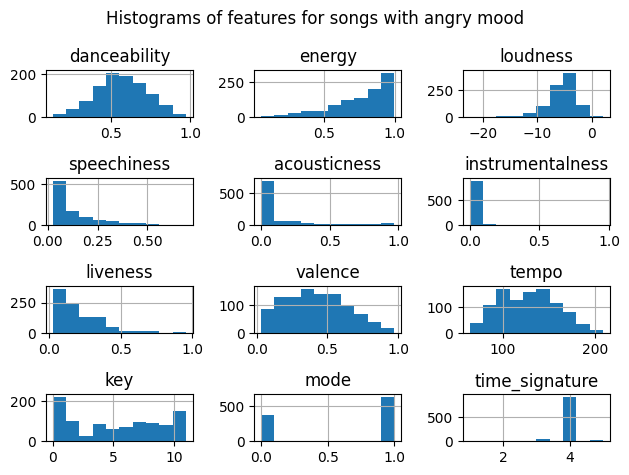

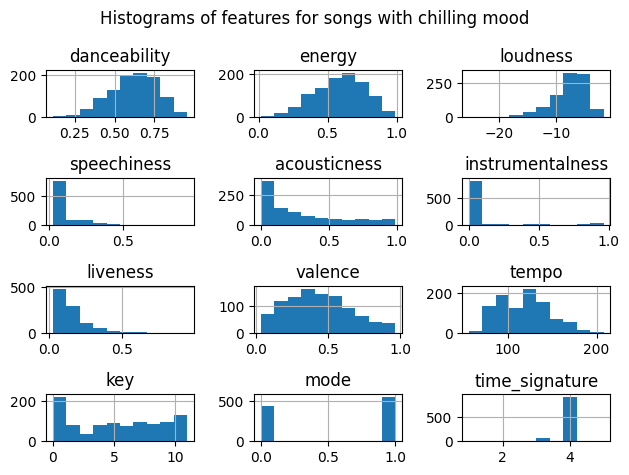

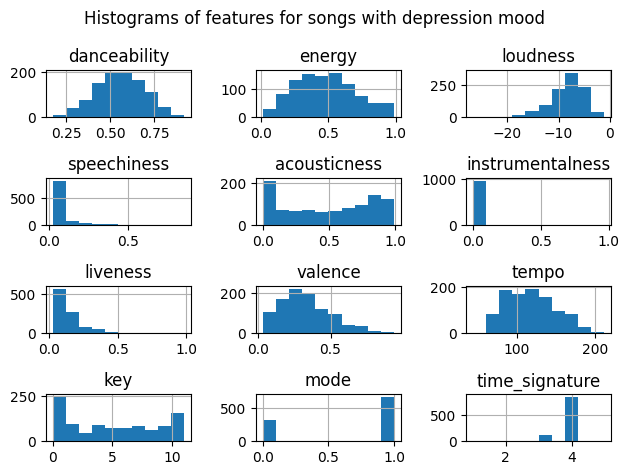

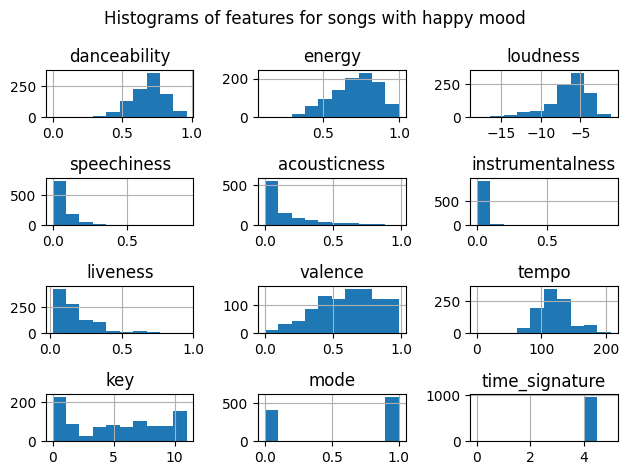

In [25]:
# plot histograms of 9 features of songs with different moods
for name, group in all_data.groupby('mood'):
    group[all_data.columns[:-1].tolist()].hist(bins=10)
    plt.suptitle(f'Histograms of features for songs with {name} mood')
    plt.tight_layout()
    plt.show()

In [4]:
continuous_data=continuous[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
continuous_data_n=preprocessing.scale(continuous_data)

In [5]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(np.array(mood).reshape(-1, 1))
x_cat=encoder.fit_transform(np.array(category.iloc[:,0:2]))
con_cat_data=np.concatenate([x_cat,continuous_data_n],axis=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
variable_select=continuous[["danceability","energy","loudness","acousticness","valence"]]
var_select_normal=preprocessing.scale(variable_select)
varselect_cat_data=np.concatenate([x_cat,var_select_normal],axis=1)

In [7]:
#all continuous data
#test 20%, train 72%, validation 8%
x_remain,x_test,y_remain,y_test=train_test_split(continuous_data_n,y,test_size=0.2,random_state=42)
x_cv,x_train,y_cv,y_train=train_test_split(x_remain,y_remain,test_size=0.9,random_state=42)

In [8]:
#all continuous data and categorial data
#test 20%, train 72%, validation 8%
overall_x_remain,overall_x_test,overall_y_remain,overall_y_test=train_test_split(con_cat_data,y,test_size=0.2,random_state=42)
overall_x_cv,overall_x_train,overall_y_cv,overall_y_train=train_test_split(overall_x_remain,overall_y_remain,test_size=0.9,random_state=42)

In [9]:
#selected variable based on heatmap
#test 20%, train 72%, validation 8%
varselect_x_remain,varselect_x_test,varselect_y_remain,varselect_y_test=train_test_split(varselect_cat_data,y,test_size=0.2,random_state=42)
varselect_x_cv,varselect_x_train,varselect_y_cv,varselect_y_train=train_test_split(varselect_x_remain,varselect_y_remain,test_size=0.9,random_state=42)

In [10]:
from sklearn.decomposition import PCA

#all continuous data
# Make an instance of the Model
pca = PCA(.95)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_cv_pca=pca.transform(x_cv)
pca.n_components_

8

In [11]:
#all continuous data and categorial data
pca = PCA(.95)
pca.fit(overall_x_train)
overall_x_train_pca = pca.transform(overall_x_train)
overall_x_test_pca = pca.transform(overall_x_test)
overall_x_cv_pca=pca.transform(overall_x_cv)
pca.n_components_

14

In [12]:
#selceted data 
pca=PCA(.95)
pca.fit(varselect_x_train)
varselect_x_train_pca=pca.transform(varselect_x_train)
varselect_x_test_pca=pca.transform(varselect_x_test)
varselect_x_cv_pca=pca.transform(varselect_x_cv)
pca.n_components_

13

In [13]:
def DNN(x_test,x_train,y_test,y_train,x_cv,y_cv):
    shape=x_train.shape[1]
    for activation in ["relu"]:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(name='input_layer',units=80, input_shape=(shape,), activation='relu'),
            tf.keras.layers.Dense(20, name='hidden_layer_1',activation=activation),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(20, name='hidden_layer_2',activation=activation),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, name='hidden_layer_3',activation=activation),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, name='hidden_layer_4',activation=activation),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(4,name='output_layer' ,activation='softmax')])

        optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
        for i in optimizers:
            model.compile(optimizer=i, loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(x_train, y_train, epochs=2000, batch_size=20, verbose=0, validation_data=(x_cv,y_cv))
            loss, accuracy = model.evaluate(x_test, y_test)
            print(f"Test loss - {i} with activation fn {activation}: {loss:.4f}")
            print(f"Test accuracy - {i} with activation fn {activation}: {accuracy:.4f}")
    return model

In [54]:
#continuous data with pca
DNN(x_test_pca,x_train_pca,y_test,y_train,x_cv_pca,y_cv)

25/25 [==============================] - 0s 657us/step - loss: 1.2356 - accuracy: 0.5150
Test loss - Adadelta with activation fn relu: 1.2356
Test accuracy - Adadelta with activation fn relu: 0.5150
25/25 [==============================] - 0s 1ms/step - loss: 1.1330 - accuracy: 0.5462
Test loss - Adagrad with activation fn relu: 1.1330
Test accuracy - Adagrad with activation fn relu: 0.5462
25/25 [==============================] - 0s 819us/step - loss: 2.3752 - accuracy: 0.4750
Test loss - Adam with activation fn relu: 2.3752
Test accuracy - Adam with activation fn relu: 0.4750
25/25 [==============================] - 0s 811us/step - loss: 2.1098 - accuracy: 0.4800
Test loss - RMSprop with activation fn relu: 2.1098
Test accuracy - RMSprop with activation fn relu: 0.4800
25/25 [==============================] - 0s 605us/step - loss: 1.7781 - accuracy: 0.4375
Test loss - SGD with activation fn relu: 1.7781
Test accuracy - SGD with activation fn relu: 0.4375


In [55]:
#continuous data without pca
DNN(x_test,x_train,y_test,y_train,x_cv,y_cv)

25/25 [==============================] - 0s 661us/step - loss: 1.2504 - accuracy: 0.4938
Test loss - Adadelta with activation fn relu: 1.2504
Test accuracy - Adadelta with activation fn relu: 0.4938
25/25 [==============================] - 0s 584us/step - loss: 1.1474 - accuracy: 0.5163
Test loss - Adagrad with activation fn relu: 1.1474
Test accuracy - Adagrad with activation fn relu: 0.5163
25/25 [==============================] - 0s 592us/step - loss: 2.1144 - accuracy: 0.5038
Test loss - Adam with activation fn relu: 2.1144
Test accuracy - Adam with activation fn relu: 0.5038
25/25 [==============================] - 0s 635us/step - loss: 2.6262 - accuracy: 0.4963
Test loss - RMSprop with activation fn relu: 2.6262
Test accuracy - RMSprop with activation fn relu: 0.4963
25/25 [==============================] - 0s 747us/step - loss: 1.3913 - accuracy: 0.2612
Test loss - SGD with activation fn relu: 1.3913
Test accuracy - SGD with activation fn relu: 0.2612


In [56]:
#selected overall data without pca: categorical variable and continuous variable
DNN(varselect_x_test,varselect_x_train,varselect_y_test,varselect_y_train,varselect_x_cv,varselect_y_cv)

25/25 [==============================] - 0s 1ms/step - loss: 1.1908 - accuracy: 0.5038
Test loss - Adadelta with activation fn relu: 1.1908
Test accuracy - Adadelta with activation fn relu: 0.5038
25/25 [==============================] - 0s 807us/step - loss: 1.1362 - accuracy: 0.5150
Test loss - Adagrad with activation fn relu: 1.1362
Test accuracy - Adagrad with activation fn relu: 0.5150
25/25 [==============================] - 0s 829us/step - loss: 7.3103 - accuracy: 0.4550
Test loss - Adam with activation fn relu: 7.3103
Test accuracy - Adam with activation fn relu: 0.4550
25/25 [==============================] - 0s 681us/step - loss: 1.8225 - accuracy: 0.4775
Test loss - RMSprop with activation fn relu: 1.8225
Test accuracy - RMSprop with activation fn relu: 0.4775
25/25 [==============================] - 0s 630us/step - loss: 1.3883 - accuracy: 0.2425
Test loss - SGD with activation fn relu: 1.3883
Test accuracy - SGD with activation fn relu: 0.2425


In [14]:
#selected overall data with pca: categorical variable and continuous variable
DNN(varselect_x_test_pca,varselect_x_train_pca,varselect_y_test,varselect_y_train,varselect_x_cv_pca,varselect_y_cv)

25/25 [==============================] - 0s 468us/step - loss: 1.2013 - accuracy: 0.5075
Test loss - Adadelta with activation fn relu: 1.2013
Test accuracy - Adadelta with activation fn relu: 0.5075
25/25 [==============================] - 0s 553us/step - loss: 1.1322 - accuracy: 0.5225
Test loss - Adagrad with activation fn relu: 1.1322
Test accuracy - Adagrad with activation fn relu: 0.5225
25/25 [==============================] - 0s 523us/step - loss: 3.3949 - accuracy: 0.4425
Test loss - Adam with activation fn relu: 3.3949
Test accuracy - Adam with activation fn relu: 0.4425
25/25 [==============================] - 0s 523us/step - loss: 4.0213 - accuracy: 0.4200
Test loss - RMSprop with activation fn relu: 4.0213
Test accuracy - RMSprop with activation fn relu: 0.4200
25/25 [==============================] - 0s 477us/step - loss: 1.3902 - accuracy: 0.2275
Test loss - SGD with activation fn relu: 1.3902
Test accuracy - SGD with activation fn relu: 0.2275


In [57]:
#overall data with pca: categorical variable and continuous variable
DNN(overall_x_test_pca,overall_x_train_pca,overall_y_test,overall_y_train,overall_x_cv_pca,overall_y_cv)

25/25 [==============================] - 0s 925us/step - loss: 1.3179 - accuracy: 0.3738
Test loss - Adadelta with activation fn relu: 1.3179
Test accuracy - Adadelta with activation fn relu: 0.3738
25/25 [==============================] - 0s 779us/step - loss: 1.1400 - accuracy: 0.5188
Test loss - Adagrad with activation fn relu: 1.1400
Test accuracy - Adagrad with activation fn relu: 0.5188
25/25 [==============================] - 0s 894us/step - loss: 5.4495 - accuracy: 0.5150
Test loss - Adam with activation fn relu: 5.4495
Test accuracy - Adam with activation fn relu: 0.5150
25/25 [==============================] - 0s 782us/step - loss: 3.9907 - accuracy: 0.4512
Test loss - RMSprop with activation fn relu: 3.9907
Test accuracy - RMSprop with activation fn relu: 0.4512
25/25 [==============================] - 0s 861us/step - loss: 1.2958 - accuracy: 0.3925
Test loss - SGD with activation fn relu: 1.2958
Test accuracy - SGD with activation fn relu: 0.3925


In [58]:
#overall data: categorical variable and continuous variable
DNN(overall_x_test,overall_x_train,overall_y_test,overall_y_train,overall_x_cv,overall_y_cv)

25/25 [==============================] - 0s 1ms/step - loss: 1.1922 - accuracy: 0.5138
Test loss - Adadelta with activation fn relu: 1.1922
Test accuracy - Adadelta with activation fn relu: 0.5138
25/25 [==============================] - 0s 783us/step - loss: 1.1243 - accuracy: 0.5362
Test loss - Adagrad with activation fn relu: 1.1243
Test accuracy - Adagrad with activation fn relu: 0.5362
25/25 [==============================] - 0s 2ms/step - loss: 5.5965 - accuracy: 0.4800
Test loss - Adam with activation fn relu: 5.5965
Test accuracy - Adam with activation fn relu: 0.4800
25/25 [==============================] - 0s 886us/step - loss: 3.1092 - accuracy: 0.4938
Test loss - RMSprop with activation fn relu: 3.1092
Test accuracy - RMSprop with activation fn relu: 0.4938
25/25 [==============================] - 0s 671us/step - loss: 1.2788 - accuracy: 0.4013
Test loss - SGD with activation fn relu: 1.2788
Test accuracy - SGD with activation fn relu: 0.4013


In [59]:
###from internet : https://gist.github.com/mdipietro09/97d54ef5b2b03a0b8c7f04db75fed4e4

'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=8, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=8, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=8, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=5, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

In [60]:
model=DNN(x_test,x_train,y_test,y_train,x_cv,y_cv)

25/25 [==============================] - 0s 838us/step - loss: 1.2528 - accuracy: 0.4775
Test loss - Adadelta with activation fn relu: 1.2528
Test accuracy - Adadelta with activation fn relu: 0.4775
25/25 [==============================] - 0s 598us/step - loss: 1.1307 - accuracy: 0.5525
Test loss - Adagrad with activation fn relu: 1.1307
Test accuracy - Adagrad with activation fn relu: 0.5525
25/25 [==============================] - 0s 633us/step - loss: 3.4572 - accuracy: 0.5025
Test loss - Adam with activation fn relu: 3.4572
Test accuracy - Adam with activation fn relu: 0.5025
25/25 [==============================] - 0s 701us/step - loss: 2.1053 - accuracy: 0.5063
Test loss - RMSprop with activation fn relu: 2.1053
Test accuracy - RMSprop with activation fn relu: 0.5063
25/25 [==============================] - 0s 735us/step - loss: 1.3883 - accuracy: 0.2300
Test loss - SGD with activation fn relu: 1.3883
Test accuracy - SGD with activation fn relu: 0.2300


In [61]:
! pip3 install pydot
! pip3 install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.5 MB/s eta 0:00:00


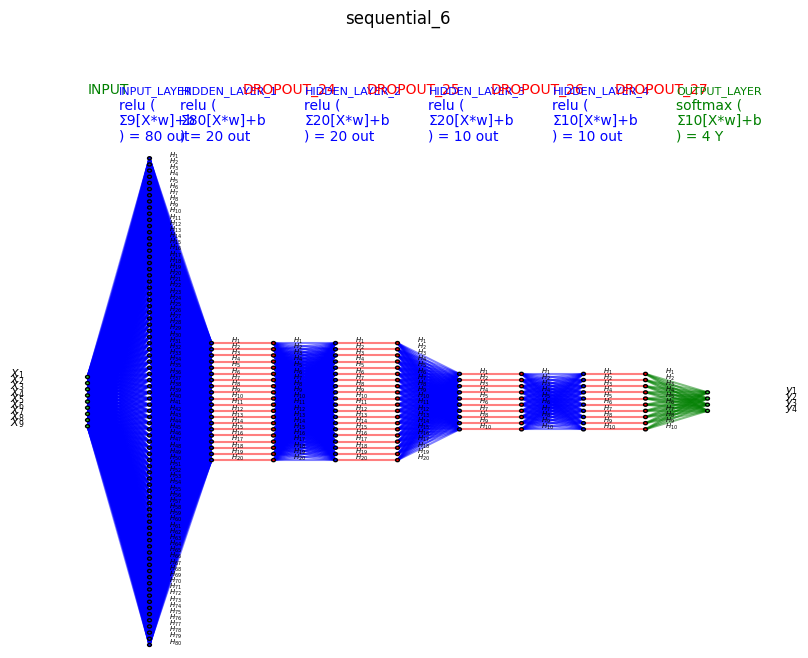

In [64]:
visualize_nn(model, description=True, figsize=(10,8))

In [62]:
import graphviz
import pydot
from keras.models import load_model

In [ ]:
#use model of overall data as example
model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(name='input_layer',units=80, input_shape=(overall_x_train.shape[1],), activation='relu'),
            tf.keras.layers.Dense(20, name='hidden_layer_1',activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(20, name='hidden_layer_2',activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, name='hidden_layer_3',activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, name='hidden_layer_4',activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(4,name='output_layer' ,activation='softmax')])
model.compile(optimizer= "Adagrad", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(overall_x_train, overall_y_train, epochs=2000, batch_size=20, verbose=0, validation_data=(overall_x_cv,overall_y_cv))

In [ ]:
#put h5 nodel in https://netron.app/
model.save('my_model.h5')

In [65]:
#train-test split on all_data
x_all_train, x_all_test, y_all_train, y_all_test = train_test_split(all_data.iloc[:,:-1], mood, test_size=0.3, random_state=42)


In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_all_train,y_all_train)
y_all_pred = dt.predict(x_all_test)
accuracy_score(y_all_test, y_all_pred)

0.43333333333333335

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_all_train,y_all_train)
y_all_pred = rf.predict(x_all_test)
accuracy_score(y_all_test, y_all_pred)

0.575

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_all_train,y_all_train)
y_all_pred = LDA.predict(x_all_test)
accuracy_score(y_all_test, y_all_pred)

0.5475